In [ ]:
###  download dataset from 

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('canteen_shop_data.csv')

In [4]:
df.head()

,Date,Time,Item,Price,Quantity,Total,Customer ID,Payment Method,Employee ID,Customer Satisfaction,Weather,Special Offers
0,2024-04-01,12:15,Sandwich,4.5,2,9.0,1,Cash,101,4,Sunny,Yes
1,2024-04-01,12:30,Drink,1.5,1,1.5,2,Card,102,3,Sunny,No
2,2024-04-01,12:45,Salad,5.0,1,5.0,3,Mobile Payment,103,5,Cloudy,Yes
3,2024-04-01,13:00,Burger,5.5,1,5.5,4,Cash,104,4,Sunny,No
4,2024-04-01,13:15,Sandwich,4.5,1,4.5,5,Card,105,3,Sunny,Yes


In [5]:
df.shape

(200, 12)

In [6]:
df.size

2400

In [7]:
df.isna().sum()

Date                     0
Time                     0
Item                     0
Price                    0
Quantity                 0
Total                    0
Customer ID              0
Payment Method           0
Employee ID              0
Customer Satisfaction    0
Weather                  0
Special Offers           0
dtype: int64

In [8]:
df.dtypes

Date                      object
Time                      object
Item                      object
Price                    float64
Quantity                   int64
Total                    float64
Customer ID                int64
Payment Method            object
Employee ID                int64
Customer Satisfaction      int64
Weather                   object
Special Offers            object
dtype: object

In [9]:
df.head()

,Date,Time,Item,Price,Quantity,Total,Customer ID,Payment Method,Employee ID,Customer Satisfaction,Weather,Special Offers
0,2024-04-01,12:15,Sandwich,4.5,2,9.0,1,Cash,101,4,Sunny,Yes
1,2024-04-01,12:30,Drink,1.5,1,1.5,2,Card,102,3,Sunny,No
2,2024-04-01,12:45,Salad,5.0,1,5.0,3,Mobile Payment,103,5,Cloudy,Yes
3,2024-04-01,13:00,Burger,5.5,1,5.5,4,Cash,104,4,Sunny,No
4,2024-04-01,13:15,Sandwich,4.5,1,4.5,5,Card,105,3,Sunny,Yes


In [10]:
df['Item'].value_counts()
dfg = df.groupby(df['Item']).sum()
dfg.head()

,Date,Time,Price,Quantity,Total,Customer ID,Payment Method,Employee ID,Customer Satisfaction,Weather,Special Offers
Item,,,,,,,,,,,
Burger,2024-04-012024-04-012024-04-022024-04-022024-0...,13:0014:0012:4513:4512:4513:4512:4513:4512:451...,275.0,73,401.5,5100,CashCardMobile PaymentCashCardMobile PaymentCa...,10100,179,SunnySunnyRainyRainySunnySunnyCloudyRainySunny...,NoNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYe...
Drink,2024-04-012024-04-012024-04-022024-04-022024-0...,12:3013:3012:1513:1512:1513:1512:1513:1512:151...,75.0,52,78.0,5000,CardMobile PaymentCashCardMobile PaymentCashCa...,10000,201,SunnyCloudySunnyCloudyCloudySunnyRainySunnyClo...,NoNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYe...
Salad,2024-04-012024-04-012024-04-022024-04-022024-0...,12:4513:4512:3013:3012:3013:3012:3013:3012:301...,250.0,73,365.0,5050,Mobile PaymentCashCardMobile PaymentCashCardMo...,10050,222,CloudyRainyCloudySunnyRainyRainySunnyCloudyRai...,YesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
Sandwich,2024-04-012024-04-012024-04-022024-04-022024-0...,12:1513:1512:0013:0012:0013:0012:0013:0012:001...,225.0,75,337.5,4950,CashCardMobile PaymentCashCardMobile PaymentCa...,9950,177,SunnySunnyRainySunnySunnyCloudyCloudyRainySunn...,YesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...


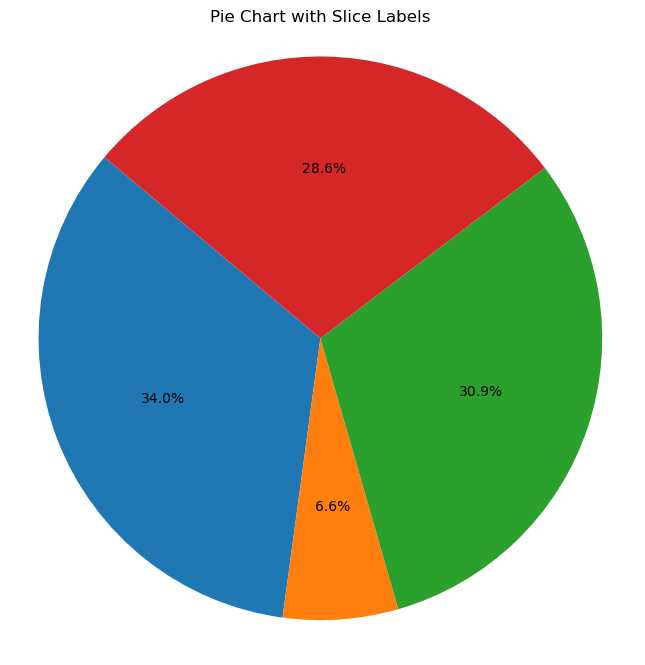

In [11]:


# Assuming 'dfg' is your DataFrame containing the data
plt.figure(figsize=(8, 8))

# Create the pie chart
pie = plt.pie(dfg['Total'], labels=dfg['Quantity'], autopct='%1.1f%%', startangle=140)

# Add labels inside each slice
for text in pie[1]:
    text.set_fontsize(12)  # Adjust font size
    text.set_color('white')  # Set text color to white

plt.axis('equal')
plt.title('Pie Chart with Slice Labels')
plt.show()


In [12]:
df.head()
df['Weather'].value_counts()

Weather
Sunny     77
Cloudy    70
Rainy     53
Name: count, dtype: int64

In [13]:
weather_map = {'Sunny':1,'Cloudy':2,'Rainy':3}
df['weather'] = df["Weather"].replace(weather_map)

In [14]:
df.head()

,Date,Time,Item,Price,Quantity,Total,Customer ID,Payment Method,Employee ID,Customer Satisfaction,Weather,Special Offers,weather
0,2024-04-01,12:15,Sandwich,4.5,2,9.0,1,Cash,101,4,Sunny,Yes,1
1,2024-04-01,12:30,Drink,1.5,1,1.5,2,Card,102,3,Sunny,No,1
2,2024-04-01,12:45,Salad,5.0,1,5.0,3,Mobile Payment,103,5,Cloudy,Yes,2
3,2024-04-01,13:00,Burger,5.5,1,5.5,4,Cash,104,4,Sunny,No,1
4,2024-04-01,13:15,Sandwich,4.5,1,4.5,5,Card,105,3,Sunny,Yes,1


In [15]:
df.describe()

,Price,Quantity,Total,Customer ID,Employee ID,Customer Satisfaction,weather
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,4.125000,1.365000,5.910000,100.500000,200.500000,3.895000,1.880000
std,1.560143,0.482638,3.359813,57.879185,57.879185,0.785532,0.799246
min,1.500000,1.000000,1.500000,1.000000,101.000000,3.000000,1.000000
25%,3.750000,1.000000,4.125000,50.750000,150.750000,3.000000,1.000000
50%,4.750000,1.000000,5.000000,100.500000,200.500000,4.000000,2.000000
75%,5.125000,2.000000,9.000000,150.250000,250.250000,5.000000,3.000000
max,5.500000,2.000000,11.000000,200.000000,300.000000,5.000000,3.000000
